In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
sims = ['hex08', 'hex20'] #['ABQ', 'CCX', 'MED']

#sims = ['CCX']
numblocks = [1, 2, 3, 4, 5, 8 , 12, 20] #, 16, 20]
dirblocks = ['01', '02', '03', '04', '05', '08', '12', '20']

In [3]:
E = 1.0
ν = 0.3

G = E/(2*(1+ν))

ρ = 1.0

lx = 0.2
ly = 0.25
lz = 0.5

A = lx*ly
Jx = 1./12*lx*ly**3
Jy = 1./12*ly*lx**3

# Roark formula for polar inertia table 10.7 pag. 401
if ly > lx:
    a = ly/2.
    b = lx/2.
else:
    a = lx/2.
    b = ly/2.

Jz = a*b**3*(16./3 - 3.36*b/a*(1-b**4/(12*a**4)))


m_th = ρ*lx*ly*lz
cg_th = np.array([0., 0., 0.25])
I_th = 1./12*m_th*np.array([(ly**2+lz**2),(lx**2+lz**2),(lx**2+ly**2)])

In [4]:
EA_th = E*A
GA_th = 5./6*G*A
EJx_th = E*Jx
EJy_th = E*Jy
GJz_th = G*Jz

In [5]:
hex08 = {}
hex20 = {}

nsim = len(numblocks)

hex08['mass'] = np.zeros((nsim-1,1))
hex20['mass'] = np.zeros((nsim,1))

hex08['cg'] = np.zeros((nsim-1,3))
hex20['cg'] = np.zeros((nsim,3))

hex08['inertia'] = np.zeros((nsim-1,3))
hex20['inertia'] = np.zeros((nsim,3))

hex08['elastic'] = np.zeros((nsim-1,6))
hex20['elastic'] = np.zeros((nsim,6))



In [6]:
for sim in sims:
    for cdb, db in enumerate(dirblocks):
        if sim == 'hex08' and cdb == 0:
            continue
        
        curr_dir = './'+db+'x10x10_'+sim
        
        print(curr_dir)
        content = os.listdir(curr_dir)
        for curr_file in content:
            if curr_file.find('mass') >= 0:
                print(curr_file)
                data = np.genfromtxt(curr_dir+'/'+curr_file)
                
                if sim == 'hex20':
                    hex20['mass'][cdb] = data[0,0]
                    hex20['cg'][cdb,:] = data[1,:]
                    hex20['inertia'][cdb,:] = np.diag(data[2:,:])
                elif sim == 'hex08':
                    hex08['mass'][cdb-1] = data[0,0]
                    hex08['cg'][cdb-1,:] = data[1,:]
                    hex08['inertia'][cdb-1,:] = np.diag(data[2:,:])
            elif curr_file.find('stiff') >= 0:
                print(curr_file)
                data = np.genfromtxt(curr_dir+'/'+curr_file)
                
                if sim == 'hex20':
                    hex20['elastic'][cdb,:] = np.diag(data)
                elif sim == 'hex08':
                    hex08['elastic'][cdb-1,:] = np.diag(data)


./02x10x10_hex08
mass_02x10x10_hex08.txt
stiff_02x10x10_hex08.txt
./03x10x10_hex08
mass_03x10x10_hex08.txt
stiff_03x10x10_hex08.txt
./04x10x10_hex08
stiff_04x10x10_hex08.txt
mass_04x10x10_hex08.txt
./05x10x10_hex08
mass_05x10x10_hex08.txt
stiff_05x10x10_hex08.txt
./08x10x10_hex08
stiff_08x10x10_hex08.txt
mass_08x10x10_hex08.txt
./12x10x10_hex08
mass_12x10x10_hex08.txt
stiff_12x10x10_hex08.txt
./20x10x10_hex08
stiff_20x10x10_hex08.txt
mass_20x10x10_hex08.txt
./01x10x10_hex20
mass_01x10x10_hex20.txt
stiff_01x10x10_hex20.txt
./02x10x10_hex20
stiff_02x10x10_hex20.txt
mass_02x10x10_hex20.txt
./03x10x10_hex20
mass_03x10x10_hex20.txt
stiff_03x10x10_hex20.txt
./04x10x10_hex20
mass_04x10x10_hex20.txt
stiff_04x10x10_hex20.txt
./05x10x10_hex20
stiff_05x10x10_hex20.txt
mass_05x10x10_hex20.txt
./08x10x10_hex20
stiff_08x10x10_hex20.txt
mass_08x10x10_hex20.txt
./12x10x10_hex20
mass_12x10x10_hex20.txt
stiff_12x10x10_hex20.txt
./20x10x10_hex20
mass_20x10x10_hex20.txt
stiff_20x10x10_hex20.txt


In [7]:
hex08

{'mass': array([[0.025],
        [0.025],
        [0.025],
        [0.025],
        [0.025],
        [0.025],
        [0.025]]),
 'cg': array([[0.25, 0.  , 0.  ],
        [0.25, 0.  , 0.  ],
        [0.25, 0.  , 0.  ],
        [0.25, 0.  , 0.  ],
        [0.25, 0.  , 0.  ],
        [0.25, 0.  , 0.  ],
        [0.25, 0.  , 0.  ]]),
 'inertia': array([[0.00021354, 0.00065104, 0.00060417],
        [0.00021354, 0.00065104, 0.00060417],
        [0.00021354, 0.00065104, 0.00060417],
        [0.00021354, 0.00065104, 0.00060417],
        [0.00021354, 0.00065104, 0.00060417],
        [0.00021354, 0.00065104, 0.00060417],
        [0.00021354, 0.00065104, 0.00060417]]),
 'elastic': array([[0.05      , 0.02446166, 0.02155176, 0.00013326, 0.00036095,
         0.00026712],
        [0.05      , 0.01972082, 0.01852794, 0.00013326, 0.00030531,
         0.00021147],
        [0.05      , 0.01806583, 0.01747255, 0.00013326, 0.00028583,
         0.000192  ],
        [0.05      , 0.01730096, 0.01698474, 0.0

In [8]:
hex20

{'mass': array([[0.025],
        [0.025],
        [0.025],
        [0.025],
        [0.025],
        [0.025],
        [0.025],
        [0.025]]),
 'cg': array([[0.25, 0.  , 0.  ],
        [0.25, 0.  , 0.  ],
        [0.25, 0.  , 0.  ],
        [0.25, 0.  , 0.  ],
        [0.25, 0.  , 0.  ],
        [0.25, 0.  , 0.  ],
        [0.25, 0.  , 0.  ],
        [0.25, 0.  , 0.  ]]),
 'inertia': array([[0.00021354, 0.00065104, 0.00060417],
        [0.00021354, 0.00065104, 0.00060417],
        [0.00021354, 0.00065104, 0.00060417],
        [0.00021354, 0.00065104, 0.00060417],
        [0.00021354, 0.00065104, 0.00060417],
        [0.00021354, 0.00065104, 0.00060417],
        [0.00021354, 0.00065104, 0.00060417],
        [0.00021354, 0.00065104, 0.00060417]]),
 'elastic': array([[0.05      , 0.02276309, 0.01857324, 0.00013211, 0.00026042,
         0.00016667],
        [0.05      , 0.01620312, 0.01615027, 0.00013211, 0.00026042,
         0.00016667],
        [0.05      , 0.01589343, 0.01601679, 0.0

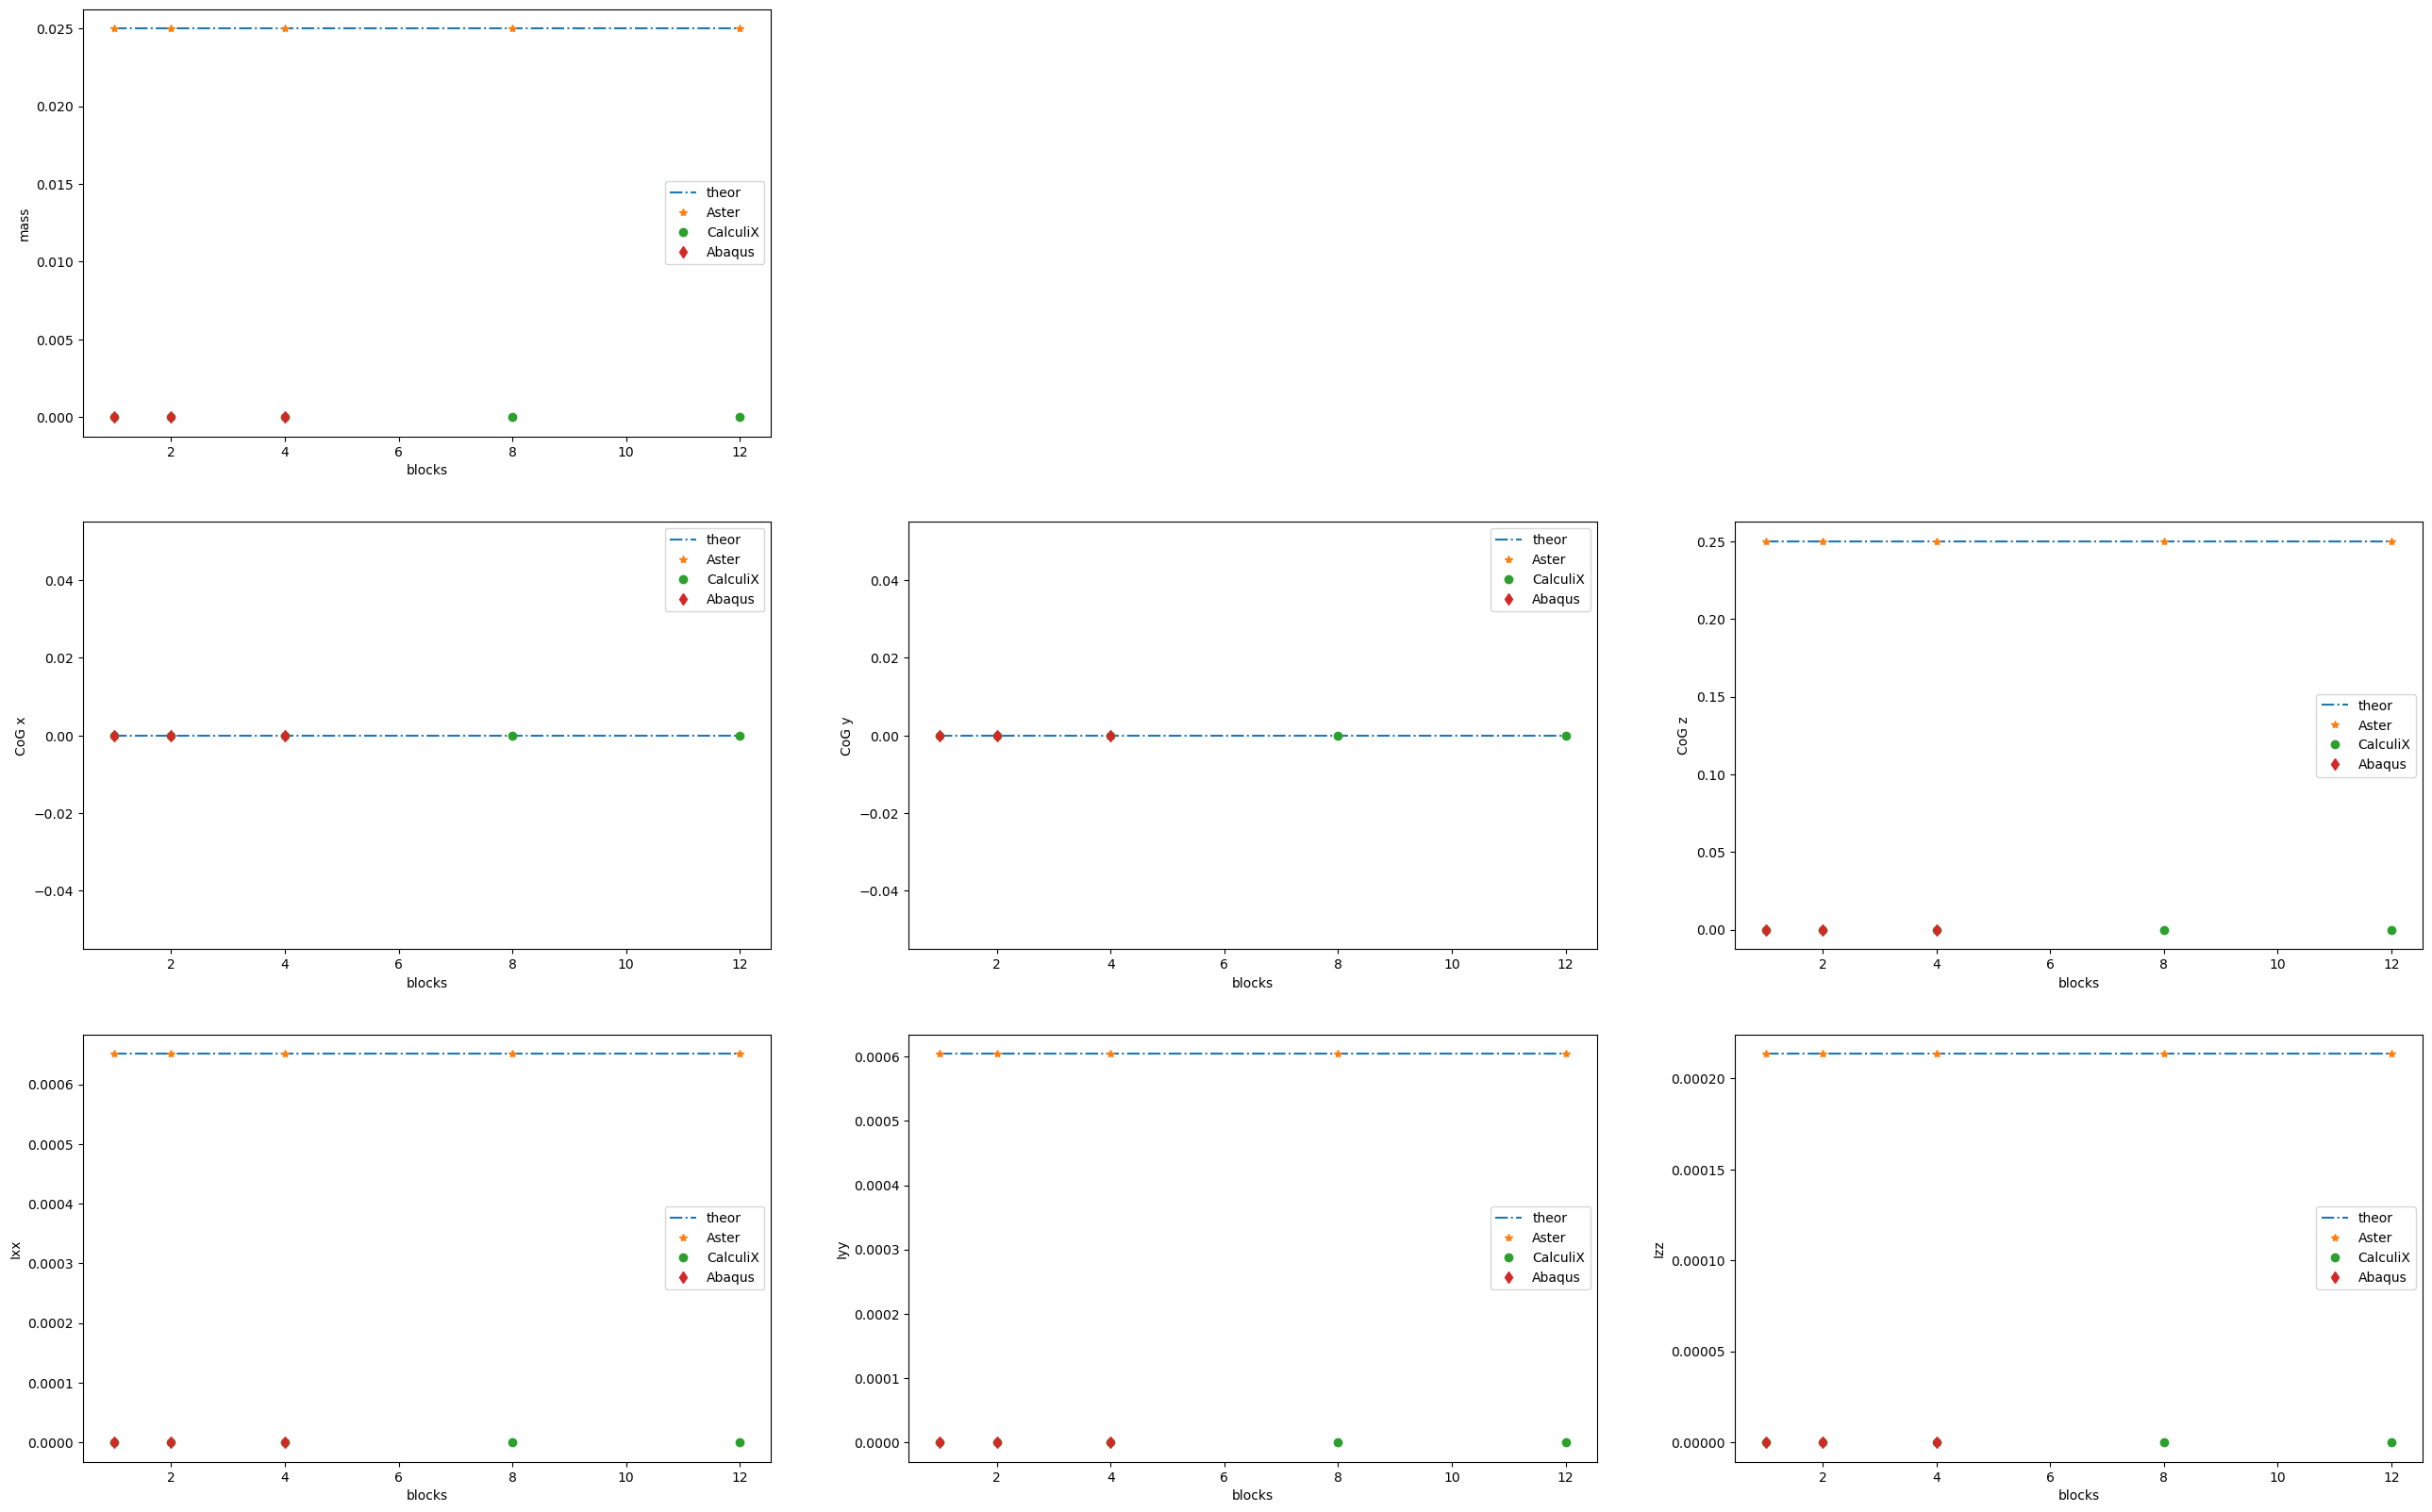

In [10]:
plt.figure(figsize=(32,20))
plt.subplot(3,3,1)
plt.plot([numblocks[0], numblocks[-1]], [m_th, m_th], '-.', label='theor')
plt.plot(numblocks, med['mass'], '*', label = 'Aster')
plt.plot(numblocks, ccx['mass'], 'o', label = 'CalculiX')
plt.plot(numblocks[0:3], abq['mass'], 'd', label = 'Abaqus')
plt.xlabel('blocks')
plt.ylabel('mass')
plt.legend();

plt.subplot(3,3,4)
plt.plot([numblocks[0], numblocks[-1]], [cg_th[0], cg_th[0]], '-.', label='theor')
plt.plot(numblocks, med['cg'][:,0], '*', label = 'Aster')
plt.plot(numblocks, ccx['cg'][:,0], 'o', label = 'CalculiX')
plt.plot(numblocks[0:3], abq['cg'][:,0], 'd', label = 'Abaqus')
plt.xlabel('blocks')
plt.ylabel('CoG x')
plt.legend();

plt.subplot(3,3,5)
plt.plot([numblocks[0], numblocks[-1]], [cg_th[1], cg_th[1]], '-.', label='theor')
plt.plot(numblocks, med['cg'][:,1], '*', label = 'Aster')
plt.plot(numblocks, ccx['cg'][:,1], 'o', label = 'CalculiX')
plt.plot(numblocks[0:3], abq['cg'][:,1], 'd', label = 'Abaqus')
plt.xlabel('blocks')
plt.ylabel('CoG y')
plt.legend();

plt.subplot(3,3,6)
plt.plot([numblocks[0], numblocks[-1]], [cg_th[2], cg_th[2]], '-.', label='theor')
plt.plot(numblocks, med['cg'][:,2], '*', label = 'Aster')
plt.plot(numblocks, ccx['cg'][:,2], 'o', label = 'CalculiX')
plt.plot(numblocks[0:3], abq['cg'][:,2], 'd', label = 'Abaqus')
plt.xlabel('blocks')
plt.ylabel('CoG z')
plt.legend();

plt.subplot(3,3,7)
plt.plot([numblocks[0], numblocks[-1]], [I_th[0], I_th[0]], '-.', label='theor')
plt.plot(numblocks, med['inertia'][:,0], '*', label = 'Aster')
plt.plot(numblocks, ccx['inertia'][:,0], 'o', label = 'CalculiX')
plt.plot(numblocks[0:3], abq['inertia'][:,0], 'd', label = 'Abaqus')
plt.xlabel('blocks')
plt.ylabel('Ixx')
plt.legend();

plt.subplot(3,3,8)
plt.plot([numblocks[0], numblocks[-1]], [I_th[1], I_th[1]], '-.', label='theor')
plt.plot(numblocks, med['inertia'][:,1], '*', label = 'Aster')
plt.plot(numblocks, ccx['inertia'][:,1], 'o', label = 'CalculiX')
plt.plot(numblocks[0:3], abq['inertia'][:,1], 'd', label = 'Abaqus')
plt.xlabel('blocks')
plt.ylabel('Iyy')
plt.legend();

plt.subplot(3,3,9)
plt.plot([numblocks[0], numblocks[-1]], [I_th[2], I_th[2]], '-.', label='theor')
plt.plot(numblocks, med['inertia'][:,2], '*', label = 'Aster')
plt.plot(numblocks, ccx['inertia'][:,2], 'o', label = 'CalculiX')
plt.plot(numblocks[0:3], abq['inertia'][:,2], 'd', label = 'Abaqus')
plt.xlabel('blocks')
plt.ylabel('Izz')
plt.legend();
plt.savefig('mass.png')

In [11]:
I_th

array([0.00065104, 0.00060417, 0.00021354])

In [12]:
med['elastic']

array([[0.04665859, 0.02719493, 0.05      , 0.00026042, 0.00016667,
        0.0001626 ],
       [0.01733843, 0.01709048, 0.05      , 0.00026042, 0.00016667,
        0.00013951],
       [0.0165508 , 0.01666066, 0.05      , 0.00026042, 0.00016667,
        0.00013756],
       [0.01650246, 0.0166341 , 0.05      , 0.00026042, 0.00016667,
        0.0001374 ],
       [0.01649985, 0.01663267, 0.05      , 0.00026042, 0.00016667,
        0.00013739]])

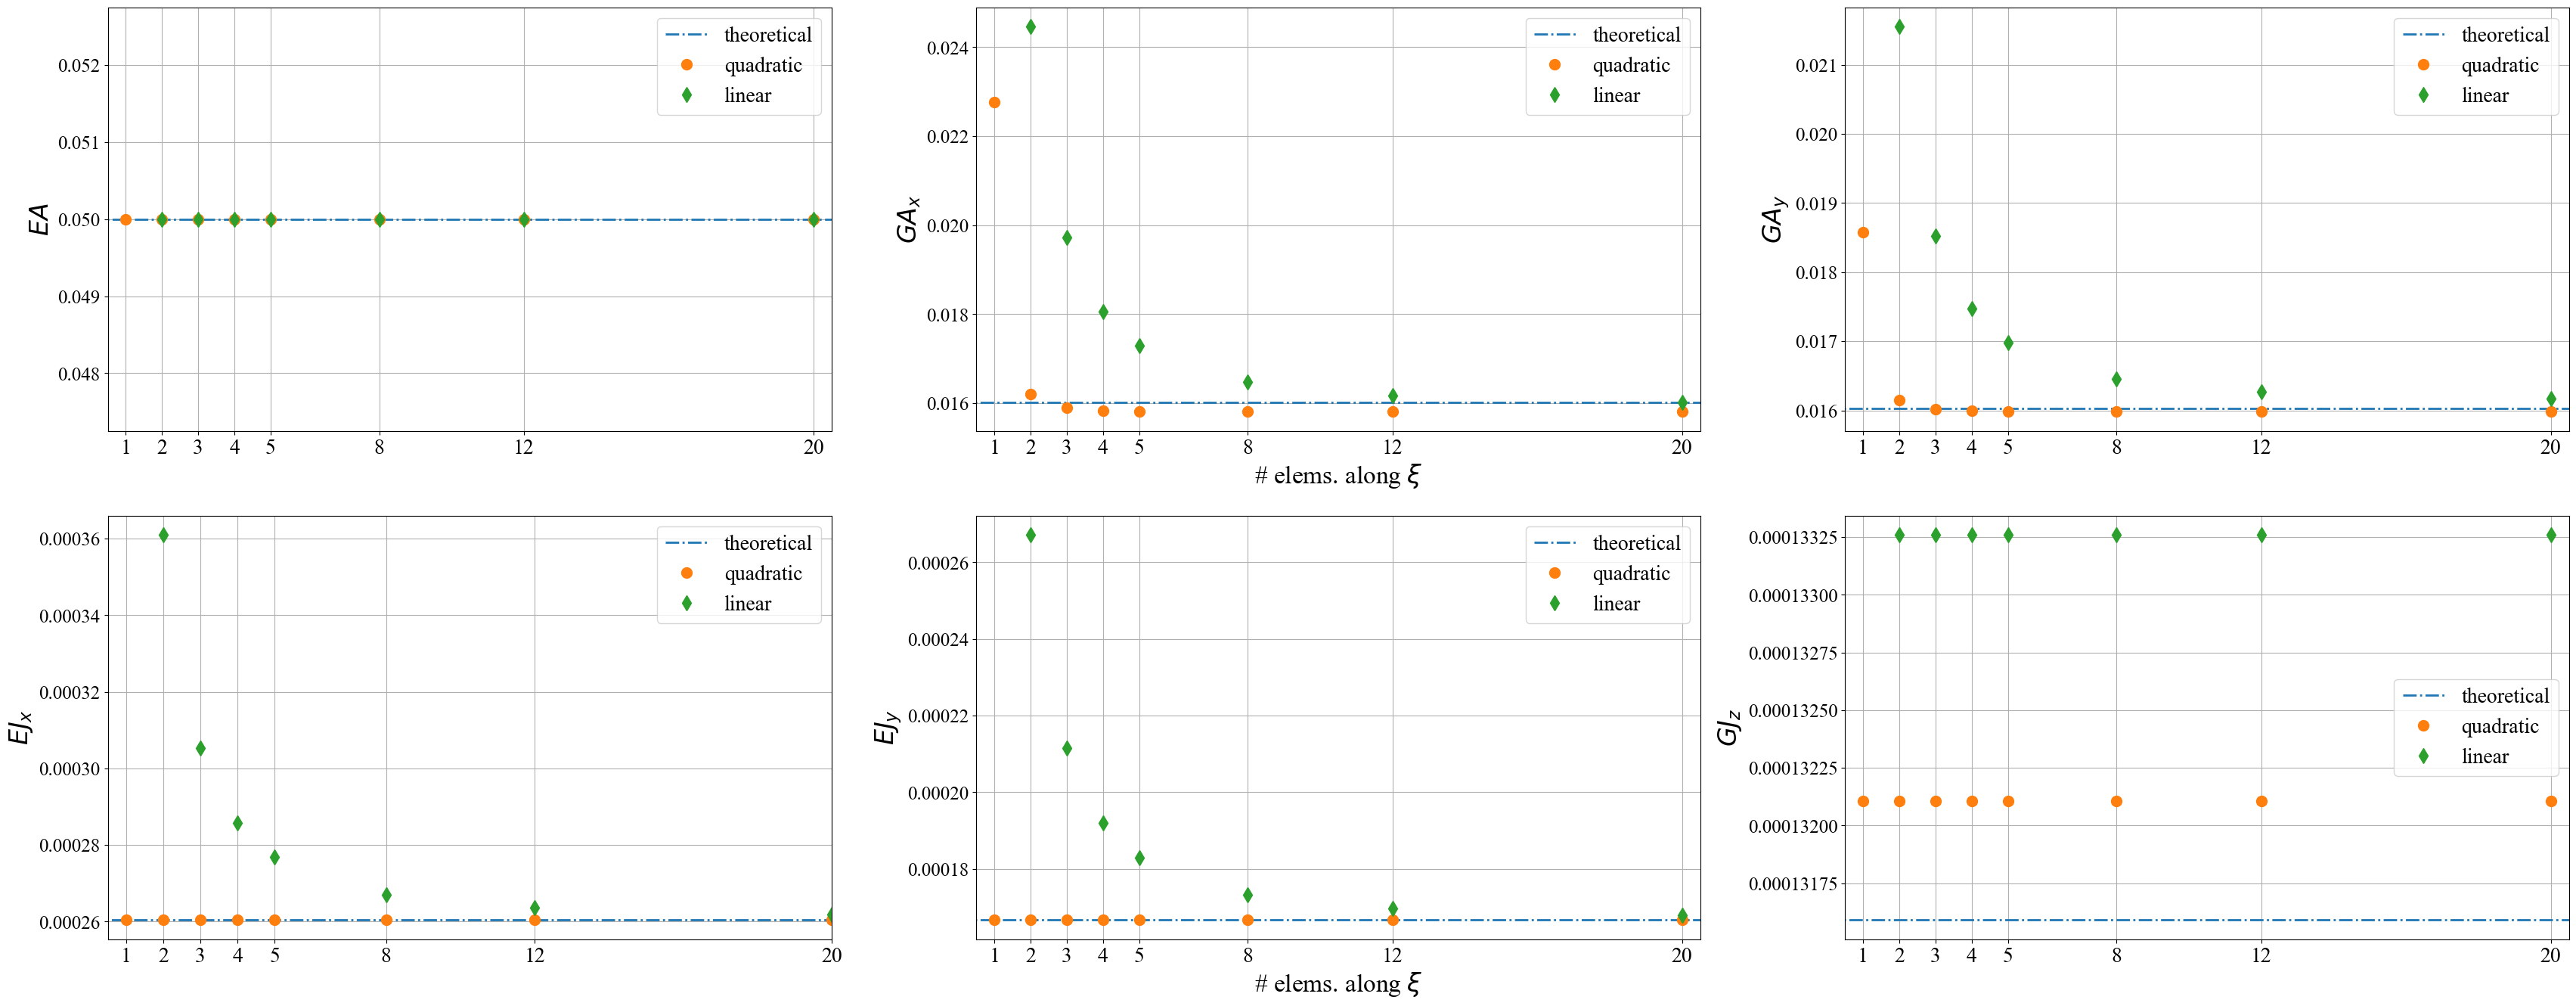

In [12]:
fs = 24

plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.serif'] = ['Times New Roman']

plt.figure(figsize=(42,16))
plt.subplot(2,3,1)
plt.plot([0,40], [EA_th, EA_th], '-.', lw=2, label='theoretical')
plt.plot(numblocks, hex20['elastic'][:,0], 'o', ms=10, label = 'quadratic')
plt.plot(numblocks[1:], hex08['elastic'][:,0], 'd', ms=10, label = 'linear')
#plt.plot(numblocks[0:3], abq['elastic'][:,2], 'd', label = 'Abaqus')
#plt.xlabel('# elems. along axis', fontsize=fs)
plt.xlim(numblocks[0],numblocks[-1])
plt.ylabel(r'$EA$', fontsize=fs)
plt.xlim(0.5, 20.5) #(numblocks[0],numblocks[-1])
plt.xticks(ticks=numblocks, fontsize=fs-4)
plt.yticks(fontsize=fs-6)
plt.grid()
plt.legend(fontsize=fs-4);

plt.subplot(2,3,2)
plt.plot([0,40], [GA_th, GA_th], '-.', lw=2, label='theoretical')
plt.plot(numblocks, hex20['elastic'][:,1], 'o', ms=10, label = 'quadratic')
plt.plot(numblocks[1:], hex08['elastic'][:,1], 'd', ms=10, label = 'linear')
#plt.plot(numblocks[0:3], abq['elastic'][:,0], 'd', label = 'Abaqus')
plt.xlabel(r'# elems. along $\xi$', fontsize=fs)
plt.ylabel(r'$GA_x$', fontsize=fs)
plt.xlim(0.5, 20.5) #(numblocks[0],numblocks[-1])
plt.xticks(ticks=numblocks, fontsize=fs-4)
plt.yticks(fontsize=fs-6)
plt.grid()
plt.legend(fontsize=fs-4);

plt.subplot(2,3,3)
plt.plot([0,40], [GA_th, GA_th], '-.', lw=2, label='theoretical')
plt.plot(numblocks, hex20['elastic'][:,2], 'o', ms=10, label = 'quadratic')
plt.plot(numblocks[1:], hex08['elastic'][:,2], 'd', ms= 10, label = 'linear')
#plt.plot(numblocks[0:3], abq['elastic'][:,1], 'd', label = 'Abaqus')
#plt.xlabel('# elems. along axis', fontsize=fs)
plt.ylabel(r'$GA_y$', fontsize=fs)
plt.xlim(0.5, 20.5) #(numblocks[0],numblocks[-1])
plt.xticks(ticks=numblocks, fontsize=fs-4)
plt.yticks(fontsize=fs-6)
plt.grid()
plt.legend(fontsize=fs-4);

plt.subplot(2,3,4)
plt.plot([0,40], [EJx_th, EJx_th], '-.', lw=2, label='theoretical')
plt.plot(numblocks, hex20['elastic'][:,4], 'o', ms=10, label = 'quadratic')
plt.plot(numblocks[1:], hex08['elastic'][:,4], 'd', ms=10, label = 'linear')
#plt.plot(numblocks[0:3], abq['elastic'][:,3], 'd', label = 'Abaqus')
#plt.xlabel('# elems. along axis', fontsize=fs)
plt.ylabel(r'$EJ_x$', fontsize=fs)
plt.xlim(0.5, 12.5) #(numblocks[0],numblocks[-1])
plt.xticks(ticks=numblocks, fontsize=fs-4)
plt.yticks(fontsize=fs-6)
plt.grid()
plt.legend(fontsize=fs-4);
#plt.ylim(1e3*EJx_th -1e-2,1e3*EJx_th +1e-2)

plt.subplot(2,3,5)
plt.plot([0,40], [EJy_th, EJy_th], '-.', lw=2, label='theoretical')
plt.plot(numblocks, hex20['elastic'][:,5], 'o', ms=10, label = 'quadratic')
plt.plot(numblocks[1:], hex08['elastic'][:,5], 'd', ms=10, label = 'linear')
#plt.plot(numblocks[0:3], abq['elastic'][:,4], 'd', label = 'Abaqus')
plt.xlabel(r'# elems. along $\xi$', fontsize=fs)
plt.ylabel(r'$EJ_y$', fontsize=fs)
plt.xlim(0.5, 20.5) #(numblocks[0],numblocks[-1])
plt.xticks(ticks=numblocks, fontsize=fs-4)
plt.yticks(fontsize=fs-6)
plt.grid()
#plt.ylim(1e3*EJy_th -1e-2,1e3*EJy_th +1e-2)
plt.legend(fontsize=fs-4);

plt.subplot(2,3,6)
plt.plot([0,40], [GJz_th, GJz_th], '-.', lw=2, label='theoretical')
plt.plot(numblocks, hex20['elastic'][:,3], 'o', ms=10, label = 'quadratic')
plt.plot(numblocks[1:], hex08['elastic'][:,3], 'd', ms=10, label = 'linear')
#plt.plot(numblocks[0:3], abq['elastic'][:,5], 'd', label = 'Abaqus')
#plt.xlabel('# elems. along axis', fontsize=fs)
plt.ylabel(r'$GJ_z$', fontsize=fs)
plt.xlim(0.5, 20.5) #(numblocks[0],numblocks[-1])
plt.xticks(ticks=numblocks, fontsize=fs-4)
plt.yticks(fontsize=fs-6)
plt.grid()
plt.legend(fontsize=fs-4);
plt.savefig('elastic.png')

In [14]:
GJz_th

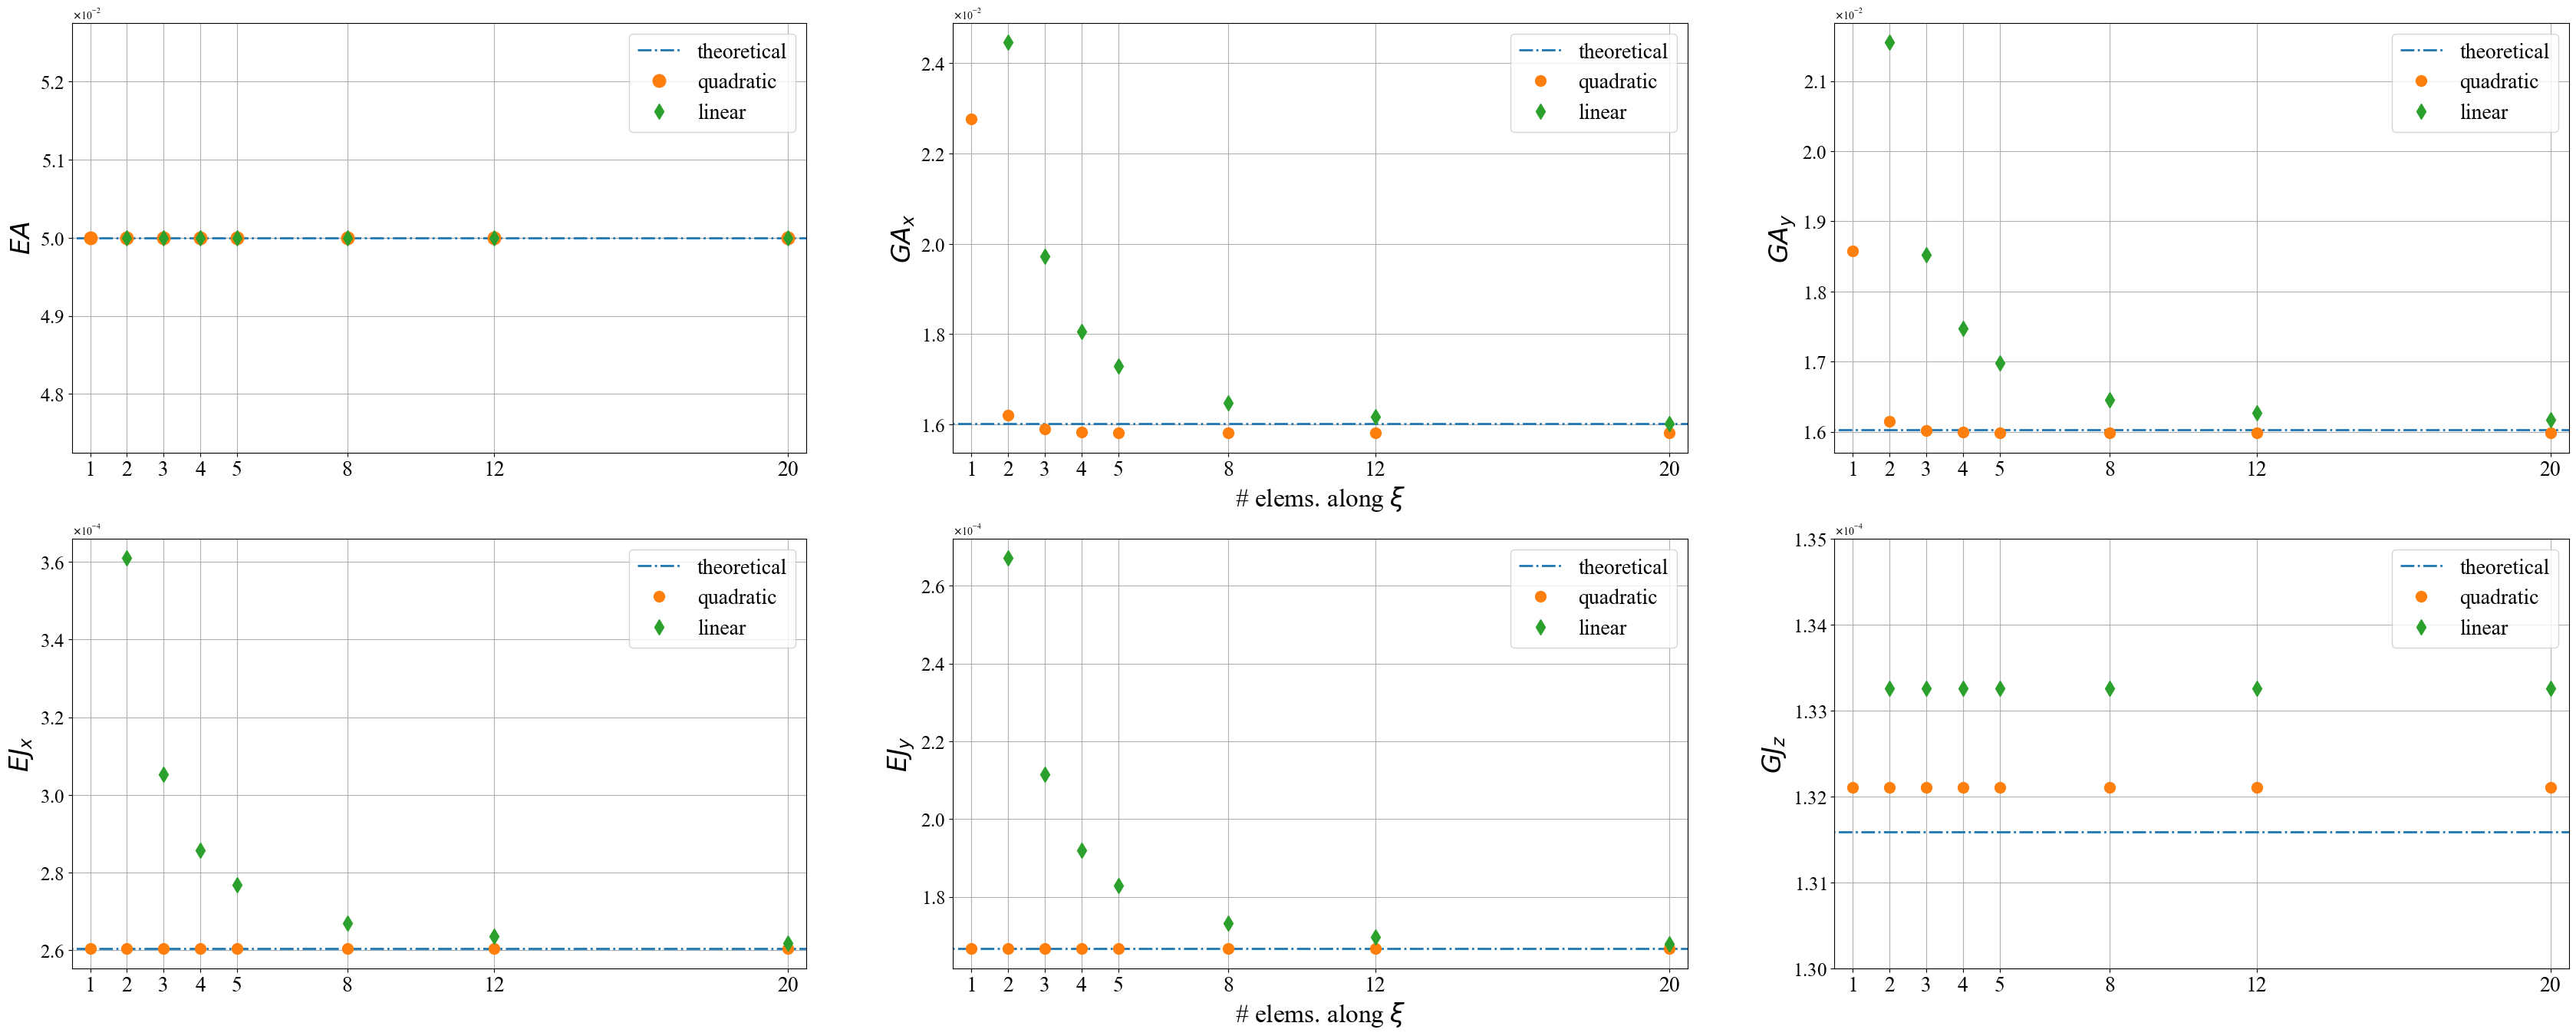

In [44]:
fs = 24

plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.serif'] = ['Times New Roman']

fig, axes = plt.subplots(2,3,figsize=(42,16))

axes[0,0].plot([0,40], [EA_th, EA_th], '-.', lw=2, label='theoretical')
axes[0,0].plot(numblocks, hex20['elastic'][:,0], 'o', ms=12, label = 'quadratic')
axes[0,0].plot(numblocks[1:], hex08['elastic'][:,0], 'd', ms=10, label = 'linear')
#plt.plot(numblocks[0:3], abq['elastic'][:,2], 'd', label = 'Abaqus')
#plt.xlabel('# elems. along axis', fontsize=fs)
axes[0,0].set_xlim(numblocks[0],numblocks[-1])
axes[0,0].set_ylabel(r'$EA$', fontsize=fs)
axes[0,0].set_xlim(0.5, 20.5) #(numblocks[0],numblocks[-1])
axes[0,0].set_xticks(ticks=numblocks)
axes[0,0].set_xticklabels(numblocks, fontsize=fs-4)
axes[0,0].tick_params(axis='y', labelsize=fs-6)
axes[0,0].ticklabel_format(axis='y', style='scientific', useOffset=False, useMathText=True, scilimits=(-1,1))
axes[0,0].grid()
axes[0,0].legend(fontsize=fs-4);

axes[0,1].plot([0,40], [GA_th, GA_th], '-.', lw=2, label='theoretical')
axes[0,1].plot(numblocks, hex20['elastic'][:,1], 'o', ms=10, label = 'quadratic')
axes[0,1].plot(numblocks[1:], hex08['elastic'][:,1], 'd', ms=10, label = 'linear')
#plt.plot(numblocks[0:3], abq['elastic'][:,0], 'd', label = 'Abaqus')
axes[0,1].set_xlabel(r'# elems. along $\xi$', fontsize=fs)
axes[0,1].set_ylabel(r'$GA_x$', fontsize=fs)
axes[0,1].set_xlim(0.5, 20.5) #(numblocks[0],numblocks[-1])
axes[0,1].set_xticks(ticks=numblocks)
axes[0,1].set_xticklabels(numblocks, fontsize=fs-4)
axes[0,1].tick_params(axis='y', labelsize=fs-6)
axes[0,1].ticklabel_format(axis='y', style='scientific', useOffset=False, useMathText=True, scilimits=(-1,1))
axes[0,1].grid()
axes[0,1].legend(fontsize=fs-4);

axes[0,2].plot([0,40], [GA_th, GA_th], '-.', lw=2, label='theoretical')
axes[0,2].plot(numblocks, hex20['elastic'][:,2], 'o', ms=10, label = 'quadratic')
axes[0,2].plot(numblocks[1:], hex08['elastic'][:,2], 'd', ms= 10, label = 'linear')
#plt.plot(numblocks[0:3], abq['elastic'][:,1], 'd', label = 'Abaqus')
#plt.xlabel('# elems. along axis', fontsize=fs)
axes[0,2].set_ylabel(r'$GA_y$', fontsize=fs)
axes[0,2].set_xlim(0.5, 20.5) #(numblocks[0],numblocks[-1])
axes[0,2].set_xticks(ticks=numblocks)
axes[0,2].set_xticklabels(numblocks, fontsize=fs-4)
axes[0,2].tick_params(axis='y', labelsize=fs-6)
axes[0,2].ticklabel_format(axis='y', style='scientific', useOffset=False, useMathText=True, scilimits=(-1,1))
axes[0,2].grid()
axes[0,2].legend(fontsize=fs-4);

axes[1,0].plot([0,40], [EJx_th, EJx_th], '-.', lw=2, label='theoretical')
axes[1,0].plot(numblocks, hex20['elastic'][:,4], 'o', ms=10, label = 'quadratic')
axes[1,0].plot(numblocks[1:], hex08['elastic'][:,4], 'd', ms=10, label = 'linear')
#plt.plot(numblocks[0:3], abq['elastic'][:,3], 'd', label = 'Abaqus')
#plt.xlabel('# elems. along axis', fontsize=fs)
axes[1,0].set_ylabel(r'$EJ_x$', fontsize=fs)
axes[1,0].set_xlim(0.5, 20.5) #(numblocks[0],numblocks[-1])
axes[1,0].set_xticks(ticks=numblocks)
axes[1,0].set_xticklabels(numblocks, fontsize=fs-4)
axes[1,0].tick_params(axis='y', labelsize=fs-6)
axes[1,0].ticklabel_format(axis='y', style='scientific', useOffset=False, useMathText=True, scilimits=(-1,1))
axes[1,0].grid()
axes[1,0].legend(fontsize=fs-4);
#plt.ylim(1e3*EJx_th -1e-2,1e3*EJx_th +1e-2)

axes[1,1].plot([0,40], [EJy_th, EJy_th], '-.', lw=2, label='theoretical')
axes[1,1].plot(numblocks, hex20['elastic'][:,5], 'o', ms=10, label = 'quadratic')
axes[1,1].plot(numblocks[1:], hex08['elastic'][:,5], 'd', ms=10, label = 'linear')
#plt.plot(numblocks[0:3], abq['elastic'][:,4], 'd', label = 'Abaqus')
axes[1,1].set_xlabel(r'# elems. along $\xi$', fontsize=fs)
axes[1,1].set_ylabel(r'$EJ_y$', fontsize=fs)
axes[1,1].set_xlim(0.5, 20.5) #(numblocks[0],numblocks[-1])
axes[1,1].set_xticks(ticks=numblocks)
axes[1,1].set_xticklabels(numblocks, fontsize=fs-4)
axes[1,1].tick_params(axis='y', labelsize=fs-6)
axes[1,1].ticklabel_format(axis='y', style='scientific', useOffset=False, useMathText=True, scilimits=(-1,1))
axes[1,1].grid()
#plt.ylim(1e3*EJy_th -1e-2,1e3*EJy_th +1e-2)
axes[1,1].legend(fontsize=fs-4);

axes[1,2].plot([0,40], [GJz_th, GJz_th], '-.', lw=2, label='theoretical')
axes[1,2].plot(numblocks, hex20['elastic'][:,3], 'o', ms=10, label = 'quadratic')
axes[1,2].plot(numblocks[1:], hex08['elastic'][:,3], 'd', ms=10, label = 'linear')
#plt.plot(numblocks[0:3], abq['elastic'][:,5], 'd', label = 'Abaqus')
#plt.xlabel('# elems. along axis', fontsize=fs)
axes[1,2].set_ylabel(r'$GJ_z$', fontsize=fs)
axes[1,2].set_xlim(0.5, 20.5) #(numblocks[0],numblocks[-1])
axes[1,2].set_ylim(1.3*1e-4, 1.35*1e-4) #(numblocks[0],numblocks[-1])
axes[1,2].set_xticks(ticks=numblocks)
axes[1,2].set_xticklabels(numblocks, fontsize=fs-4)
axes[1,2].tick_params(axis='y', labelsize=fs-6)
axes[1,2].ticklabel_format(axis='y', style='scientific', useOffset=False, useMathText=True, scilimits=(-3,1))
axes[1,2].grid()
axes[1,2].legend(fontsize=fs-4);

plt.savefig('elastic1.png')

In [15]:
ccx['elastic'][:,5]

array([0., 0., 0., 0., 0.])

In [16]:
(ccx['elastic'][:,5]-GJz_th)/GJz_th*100

array([-100., -100., -100., -100., -100.])